In [21]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# read in URLs
urls = pd.read_csv("matched_bias_scores.csv")
urls

,title,url,seendate,domain,total_repeats,score
0,"CNN Soledad OBrien , Liberal Guest Team Up to ...",https://newsbusters.org/blogs/nb/matt-hadro/20...,20200803T083000Z,newsbusters.org,2,0.8702
1,A Critical Race Tale Told by Leftist Idiots Si...,https://canadafreepress.com/article/a-critical...,20200805T150000Z,canadafreepress.com,2,0.8944
2,Amazing Benefits of Becoming Salesforce Develo...,https://www.firstcomicsnews.com/amazing-benefi...,20200806T173000Z,firstcomicsnews.com,2,NaN
3,The race is on ; Candidates address critical i...,https://www.natchitochestimes.com/2020/08/13/t...,20200813T064500Z,natchitochestimes.com,1,NaN
4,Journalist declares one - man war against cri...,https://www.foxnews.com/us/chris-rufo-one-man-...,20200814T044500Z,foxnews.com,4,0.6079
...,...,...,...,...,...,...
18821,North Carolina Professor Was Fired for Critici...,https://www.amren.com/news/2022/12/north-carol...,20221226T213000Z,amren.com,3,NaN
18822,Midterms indicate cracking down on critical ra...,http://www.msn.com/en-us/news/politics/midterm...,20221227T150000Z,msn.com,11,0.1171
18823,Woke Credit Cards ? Chris Rufo Says American E...,https://www.newsbusters.org/blogs/business/jos...,20221227T150000Z,newsbusters.org,2,0.8702
18824,North Carolina professor files lawsuit after f...,https://www.sanfordherald.com/news/state/north...,20221228T210000Z,sanfordherald.com,2,NaN


In [35]:
# read in headlines
headlines = pd.read_csv("coverage_by_unique_headline.csv")
headlines

,title,url,seendate,domain,cluster_label,stance,actor,AK_count,ALL_RELEV_count,AL_count,...,SD_count,TN_count,TX_count,USA_count,UT_count,VA_count,VT_count,WI_count,WV_count,WY_count
0,"CNN Soledad OBrien , Liberal Guest Team Up to ...",https://newsbusters.org/blogs/nb/matt-hadro/20...,20200803T083000Z,newsbusters.org,66,<DEFENDING CRT>,<POLITICAL INFLUENCER>,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,A Critical Race Tale Told by Leftist Idiots Si...,https://canadafreepress.com/article/a-critical...,20200805T150000Z,canadafreepress.com,19,<ANTI-CRT>,<NONE/OTHER>,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,Amazing Benefits of Becoming Salesforce Develo...,https://www.firstcomicsnews.com/amazing-benefi...,20200806T173000Z,firstcomicsnews.com,9,<NEUTRAL>,<NONE/OTHER>,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,The race is on ; Candidates address critical i...,https://www.natchitochestimes.com/2020/08/13/t...,20200813T064500Z,natchitochestimes.com,22,<NEUTRAL>,<POLITICAL INFLUENCER>,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Journalist declares one - man war against cri...,https://www.foxnews.com/us/chris-rufo-one-man-...,20200814T044500Z,foxnews.com,70,<ANTI-CRT>,<POLITICAL INFLUENCER>,0,2,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,North Carolina Professor Was Fired for Critici...,https://www.amren.com/news/2022/12/north-carol...,20221226T213000Z,amren.com,75,<ANTI-CRT>,<EDUCATIONAL PRACTITIONER>,0,1,0,...,0,0,0,1,0,0,0,0,0,0
11700,Midterms indicate cracking down on critical ra...,http://www.msn.com/en-us/news/politics/midterm...,20221227T150000Z,msn.com,61,<DEFENDING CRT>,<POLITICAL INFLUENCER>,0,1,0,...,0,1,1,1,0,0,0,1,0,0
11701,Woke Credit Cards ? Chris Rufo Says American E...,https://www.newsbusters.org/blogs/business/jos...,20221227T150000Z,newsbusters.org,13,<ANTI-CRT>,<POLITICAL INFLUENCER>,0,3,0,...,0,0,0,0,0,0,0,0,0,0
11702,North Carolina professor files lawsuit after f...,https://www.sanfordherald.com/news/state/north...,20221228T210000Z,sanfordherald.com,81,<NEUTRAL>,<EDUCATIONAL PRACTITIONER>,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# get repeated headlines
total_repeats = list(headlines["ALL_RELEV_count"])
total_repeats.sort(reverse=True)
total_repeats[0:50]

[83,
 78,
 75,
 73,
 68,
 65,
 63,
 63,
 63,
 61,
 61,
 61,
 60,
 59,
 58,
 57,
 56,
 54,
 52,
 52,
 51,
 49,
 48,
 47,
 46,
 46,
 43,
 42,
 39,
 39,
 39,
 38,
 38,
 37,
 34,
 33,
 31,
 31,
 30,
 29,
 28,
 28,
 28,
 27,
 27,
 26,
 25,
 25,
 24,
 24]

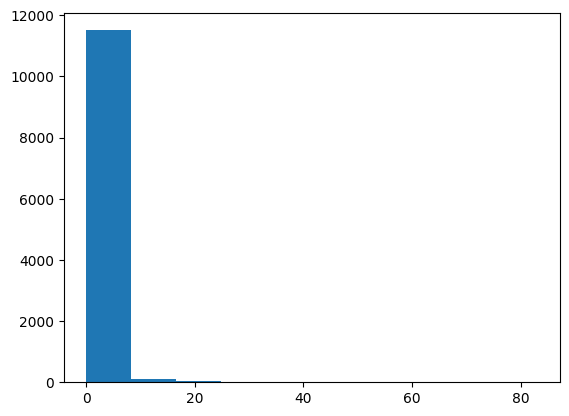

In [22]:
plt.hist(headlines["ALL_RELEV_count"])
plt.show()

In [6]:
Counter(urls["domain"]).most_common(50)

[('msn.com', 787),
 ('dupagepolicyjournal.com', 684),
 ('foxnews.com', 533),
 ('breitbart.com', 453),
 ('theepochtimes.com', 315),
 ('washingtontimes.com', 207),
 ('washingtonexaminer.com', 197),
 ('cnsnews.com', 197),
 ('bizpacreview.com', 177),
 ('newsbusters.org', 175),
 ('christianpost.com', 155),
 ('thefederalist.com', 151),
 ('newsweek.com', 148),
 ('twitchy.com', 140),
 ('redstate.com', 131),
 ('townhall.com', 111),
 ('realclearpolitics.com', 109),
 ('ruthfullyyours.com', 109),
 ('dailycaller.com', 106),
 ('freerepublic.com', 102),
 ('azbusinessdaily.com', 97),
 ('washingtonpost.com', 95),
 ('sott.net', 90),
 ('dailysignal.com', 90),
 ('news.yahoo.com', 89),
 ('amren.com', 84),
 ('americanthinker.com', 84),
 ('chron.com', 82),
 ('hotair.com', 78),
 ('wbap.com', 77),
 ('kmaj1440.com', 76),
 ('independentsentinel.com', 74),
 ('pjmedia.com', 73),
 ('thehill.com', 72),
 ('patriotpost.us', 66),
 ('zerohedge.com', 65),
 ('wgowam.com', 61),
 ('neonnettle.com', 60),
 ('980waav.com', 60)